# Data Analysis Honolulu
Here i will explore de data of Honolulu. I would like to take a holiday in Bonolulu Hawaii, but i would like to explore some data of the weather.

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, text
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from collections import defaultdict
from sqlalchemy.inspection import inspect

## Importing data

The data is saved in a Database format (SQLite) so i will use SQL Alchemy to connect and import data using SQL Queries and dave this data in a pandas dataFrame

### Connecting to Database

In [3]:
engine=create_engine('sqlite:///hawaii.sqlite')

### Query function

In [4]:
def runQuery(sql):
     result = engine.connect().execute((text(sql)))
     return pd.DataFrame(result.fetchall(), columns=result.keys())

def query_to_dict(rset):
    result = defaultdict(list)
    for obj in rset:
        instance = inspect(obj)
        for key, x in instance.attrs.items():
            result[key].append(x.value)
    return result

def query_to_pandas(data: dict):
     return pd.DataFrame(query_to_dict(data))

### Tables

In [5]:
Query = """
SELECT 
    name
FROM 
    sqlite_master 
WHERE 
    type ='table' AND 
    name NOT LIKE 'sqlite_%';
"""
runQuery(Query)

,name
0,measurement
1,station


### Tables Intances

In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)

Station = Base.classes.station
Measurement = Base.classes.measurement

session = Session(engine)

In [30]:
AllMeasurementsQuery = session.query(Measurement).all()
AllMeasirement = query_to_pandas(AllMeasurementsQuery)
AllMeasirement

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...,...
19545,19546,USC00516128,2017-08-19,0.09,71.0
19546,19547,USC00516128,2017-08-20,NaN,78.0
19547,19548,USC00516128,2017-08-21,0.56,76.0
19548,19549,USC00516128,2017-08-22,0.50,76.0


## precipitation analysis

### 1. Last 12 month


In [44]:
query_last_date = """
    select max(date) from measurement
"""
runQuery(query_last_date)

,max(date)
0,2017-08-23


In [45]:
query_prec_last12 = f"""
    select * from 
    measurement
    where date >= date(
        (
            {
                query_last_date
            }
        )
        ,
        '-12 month'
    )
"""
runQuery(query_prec_last12)

,id,station,date,prcp,tobs
0,2364,USC00519397,2016-08-23,0.00,81.0
1,2365,USC00519397,2016-08-24,0.08,79.0
2,2366,USC00519397,2016-08-25,0.08,80.0
3,2367,USC00519397,2016-08-26,0.00,79.0
4,2368,USC00519397,2016-08-27,0.00,77.0
...,...,...,...,...,...
2225,19546,USC00516128,2017-08-19,0.09,71.0
2226,19547,USC00516128,2017-08-20,NaN,78.0
2227,19548,USC00516128,2017-08-21,0.56,76.0
2228,19549,USC00516128,2017-08-22,0.50,76.0


In [14]:
query_prec_last12 = f"""
    select date, prcp from 
    measurement
    where date >= date(
        (
            {
                query_last_date
            }
        )
        ,
        '-12 month'
    )
"""
prec_last12M = runQuery(query_prec_last12)
prec_last12M

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00
...,...,...
2225,2017-08-19,0.09
2226,2017-08-20,NaN
2227,2017-08-21,0.56
2228,2017-08-22,0.50


### 2,3,4 Data on pandas dataframe, sorted

In [16]:
prec_last12M.index = prec_last12M.date
prec_last12M.index = pd.to_datetime(prec_last12M.index)
prec_last12M.sort_index(inplace=True)

In [20]:
prec_last12M

,date,prcp
date,,
2016-08-23,2016-08-23,0.00
2016-08-23,2016-08-23,NaN
2016-08-23,2016-08-23,1.79
2016-08-23,2016-08-23,0.05
2016-08-23,2016-08-23,0.15
...,...,...
2017-08-22,2017-08-22,0.00
2017-08-23,2017-08-23,0.00
2017-08-23,2017-08-23,0.00


### 5. Plot of precicpitation last 12 Months

Text(0.5, 1.0, 'Precipitation las 12 Months')

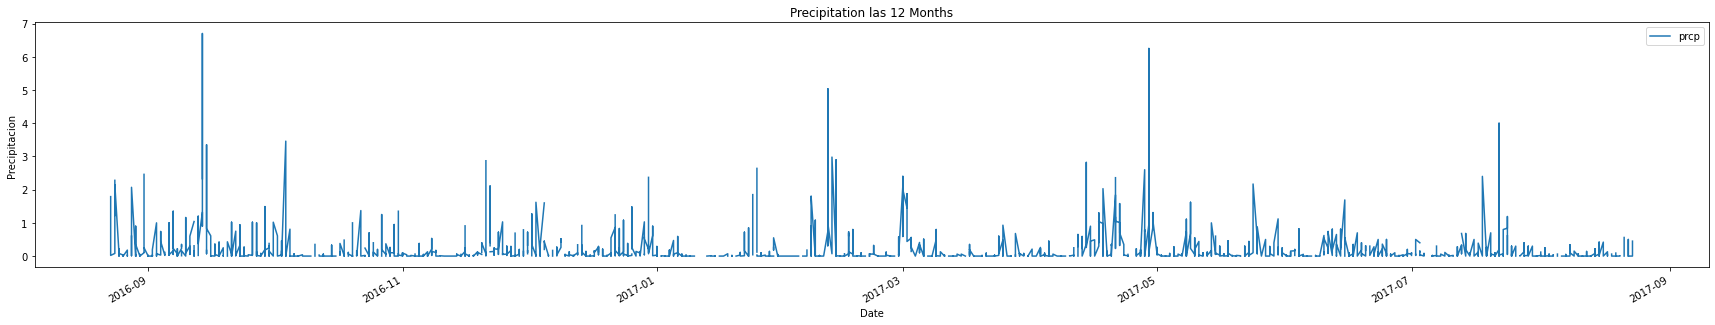

In [28]:
ax = prec_last12M[['prcp']].plot(figsize=(30,5))
ax.set_xlabel("Date")
ax.set_ylabel("Precipitacion")
ax.set_title("Precipitation las 12 Months")

### 6. Summary of all Precipitation data

In [33]:
AllMeasirement.describe()

,id,prcp,tobs
count,19550.000000,18103.000000,19550.000000
mean,9775.500000,0.160644,73.097954
std,5643.743217,0.468746,4.523527
min,1.000000,0.000000,53.000000
25%,4888.250000,0.000000,70.000000
50%,9775.500000,0.010000,73.000000
75%,14662.750000,0.110000,76.000000
max,19550.000000,11.530000,87.000000


## Measurement Station Analysis

### 1. Total Stations

In [34]:
query_last_date = """
    select count( DISTINCT station) from station
"""
runQuery(query_last_date)

,count( DISTINCT station)
0,9


### 2. Most active station

In [38]:
query_activity_stations = """
    SELECT station, count(station) as count
    from measurement
    group by station
    order by count desc
"""
runQuery(query_activity_stations)

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


The station with most activity is ``USC00519281`` with ``2772`` measurements

### 3. Last 12 Months of temperature
In this step I take only the station with most measurements over 2000

In [49]:
query_temp_last12 = f"""
    select ms.date, ms.tobs, ms.station from 
    measurement as ms
    join (
        {
            query_activity_stations
        }
    ) as activity
    on activity.station = ms.station
    where 
    ms.date >= date(
        (
            {
                query_last_date
            }
        )
        ,
        '-12 month'
    )
    and
    activity.count > 2000
"""
temp_last12M = runQuery(query_temp_last12)
temp_last12M

,date,tobs,station
0,2016-08-23,81.0,USC00519397
1,2016-08-24,79.0,USC00519397
2,2016-08-25,80.0,USC00519397
3,2016-08-26,79.0,USC00519397
4,2016-08-27,77.0,USC00519397
...,...,...,...
2042,2017-08-19,71.0,USC00516128
2043,2017-08-20,78.0,USC00516128
2044,2017-08-21,76.0,USC00516128
2045,2017-08-22,76.0,USC00516128


### 3. Plotting histogram of temperature last 12 Month, most active stations

Text(0.5, 1.0, 'Hist temperature last 12 Months most active stations')

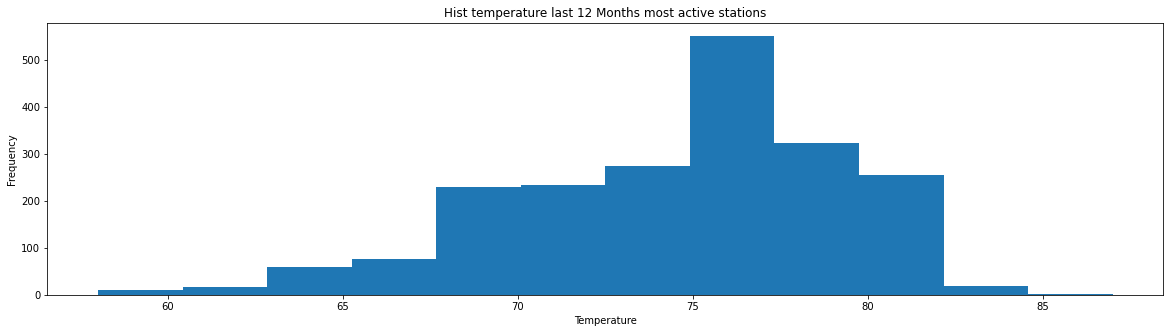

In [57]:
ax = temp_last12M['tobs'].plot(kind='hist', bins=12, figsize=(20,5))
ax.set_xlabel("Temperature")
ax.set_title("Hist temperature last 12 Months most active stations")